# **2. Ejercicios** <a class="anchor" id="Ejercicios" ></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2

from scipy.ndimage import convolve
import time

In [26]:
# Cargamos la imagen
imageoriginal = cv2.imread("/content/drive/MyDrive/Training/TEC/MNA/Computer Vision/Tarea 3/image2.jpeg")
imageoriginal = Image.fromarray(imageoriginal)
imageoriginal.thumbnail((256, 256), Image.ANTIALIAS)


<ipython-input-26-0f490a07fab8>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imageoriginal.thumbnail((256, 256), Image.ANTIALIAS)


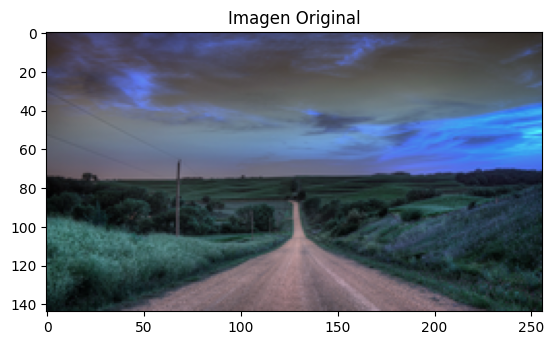

In [27]:
plt.imshow(imageoriginal)
plt.title('Imagen Original')
plt.show()

## **Ejercicio 1**<a class="anchor" id="Ejercicio1" ></a>

Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [10]:
image = cv2.imread("/content/drive/MyDrive/Training/TEC/MNA/Computer Vision/Tarea 3/image2.jpeg", cv2.IMREAD_GRAYSCALE)

In [11]:
def prewitt(image):
  """
  Implementa el detector de línea de Prewitt.

  Parámetros:
    imagen: Imagen en escala de grises.

  Devuelve:
    Imagen binaria con las líneas detectadas.
  """

  # Kernels de Prewitt
  kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
  kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

  # Filtramos la imagen con los kernels
  filtro_x = cv2.filter2D(image, -1, kernel_x)
  filtro_y = cv2.filter2D(image, -1, kernel_y)

  # Sumamos los filtros para obtener la magnitud de la gradiente
  magnitud = np.sqrt(filtro_x**2 + filtro_y**2)

  # Aplicamos un umbral para binarizar la imagen
  umbral = 128
  binaria = magnitud > umbral

  return binaria


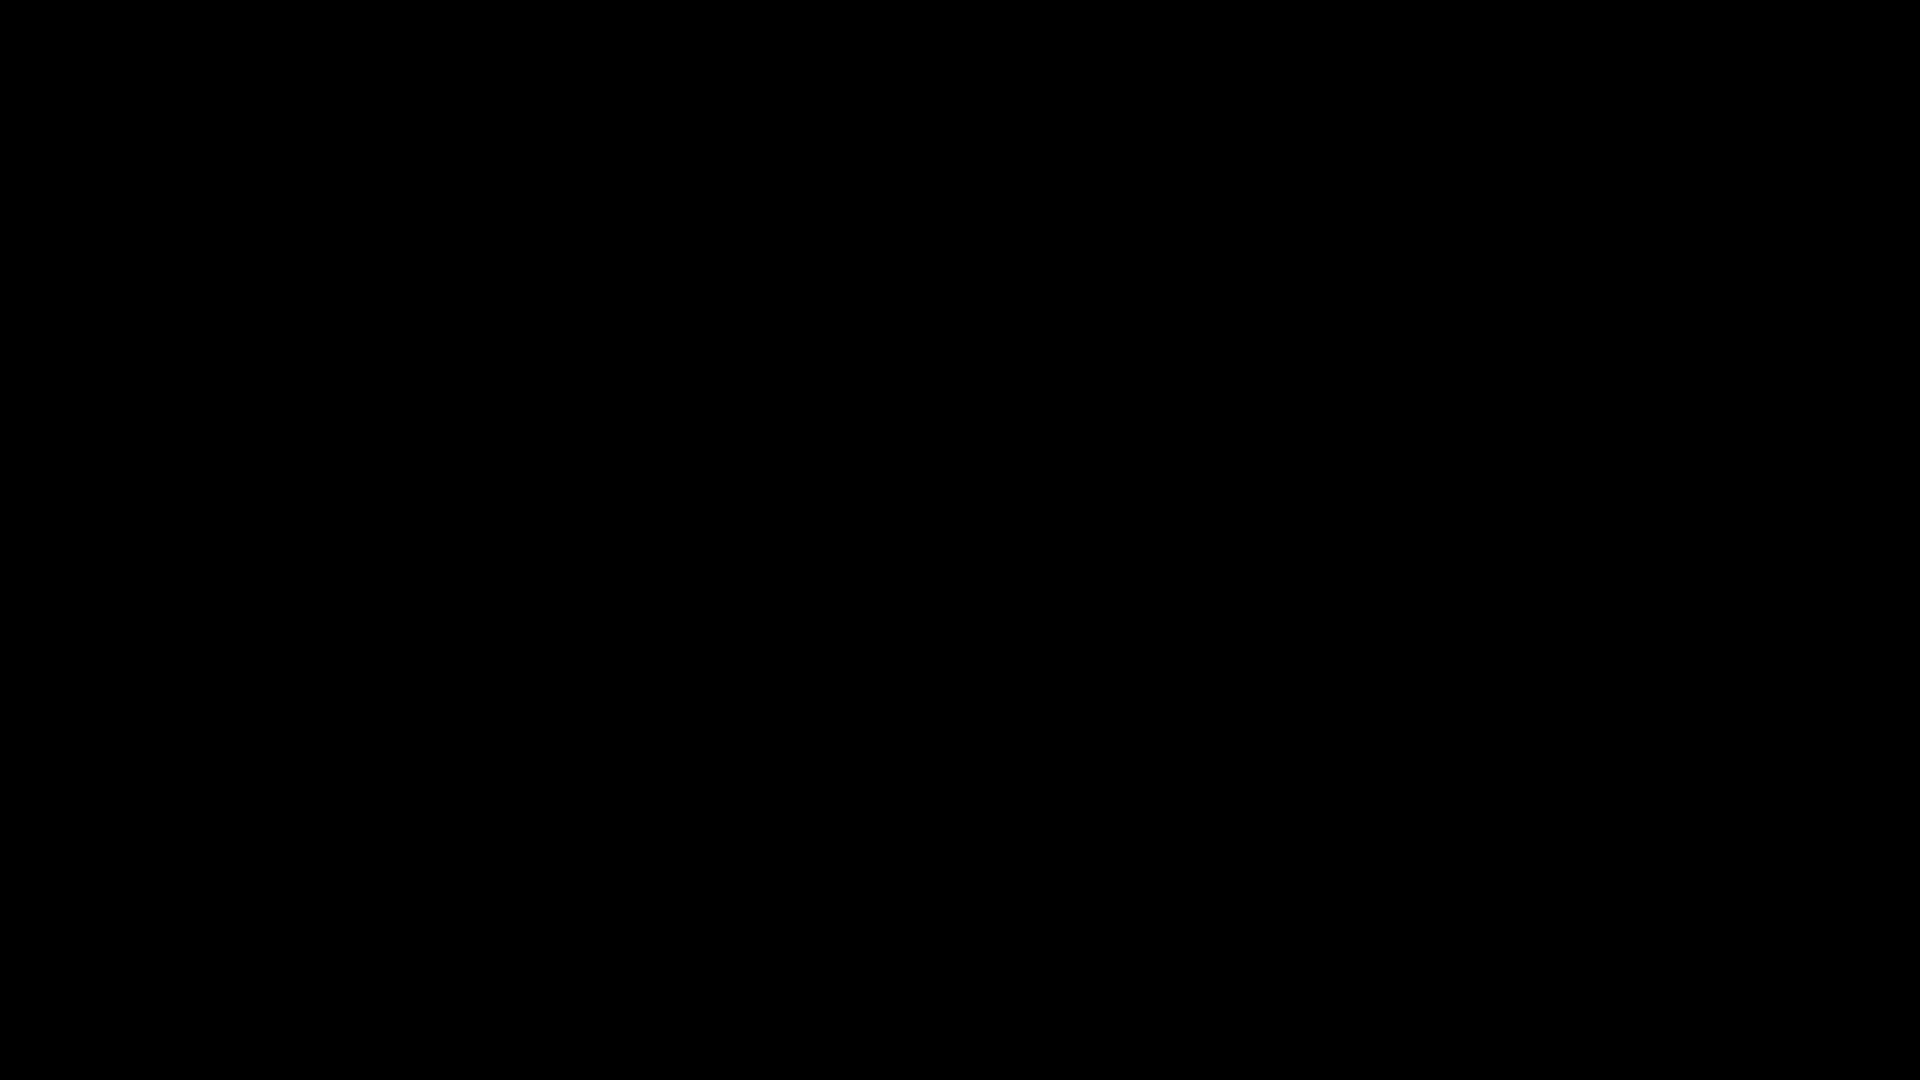

-1

In [12]:
# Aplicamos el detector de línea
binaria = prewitt(image)

# Mostramos la imagen binaria
cv2_imshow(binaria)
cv2.waitKey(0)

In [13]:
def sobel(image):
  """
  Implementa el detector de línea de Sobel.

  Parámetros:
    imagen: Imagen en escala de grises.

  Devuelve:
    Imagen binaria con las líneas detectadas.
  """

  # Kernels de Sobel
  kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
  kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 8

  # Filtramos la imagen con los kernels
  filtro_x = cv2.filter2D(image, -1, kernel_x)
  filtro_y = cv2.filter2D(image, -1, kernel_y)

  # Sumamos los filtros para obtener la magnitud de la gradiente
  magnitud = np.sqrt(filtro_x**2 + filtro_y**2)

  # Aplicamos un umbral para binarizar la imagen
  umbral = 128
  binaria = magnitud > umbral

  return binaria


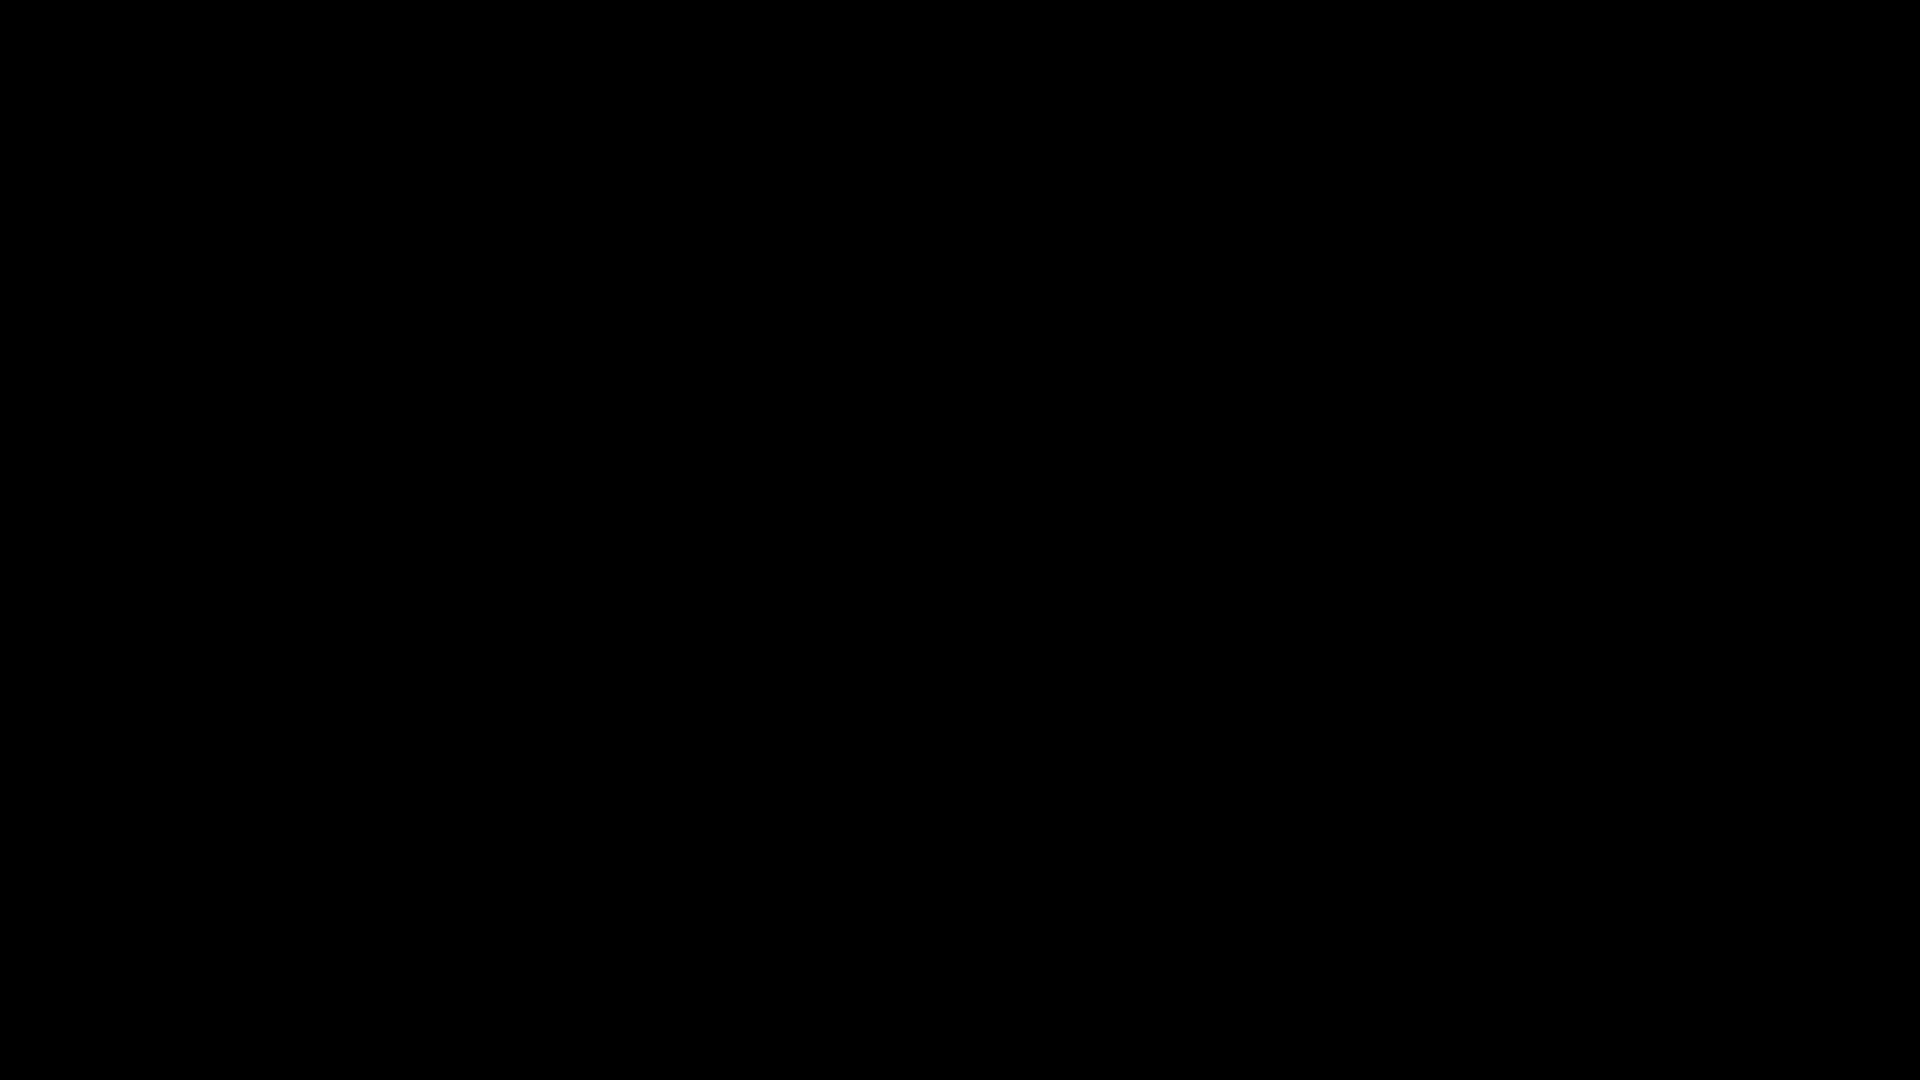

-1

In [14]:
# Aplicamos el detector de línea
binaria = sobel(image)

# Mostramos la imagen binaria
cv2_imshow(binaria)
cv2.waitKey(0)

In [15]:
def laplaciano(image):
  """
  Implementa el detector de línea de Laplaciano.

  Parámetros:
    imagen: Imagen en escala de grises.

  Devuelve:
    Imagen binaria con las líneas detectadas.
  """

  # Kernel de Laplaciano
  kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

  # Filtramos la imagen con el kernel
  filtro = cv2.filter2D(image, -1, kernel)

  # Aplicamos un umbral para binarizar la imagen
  umbral = 1
  binaria = filtro > umbral

  return binaria


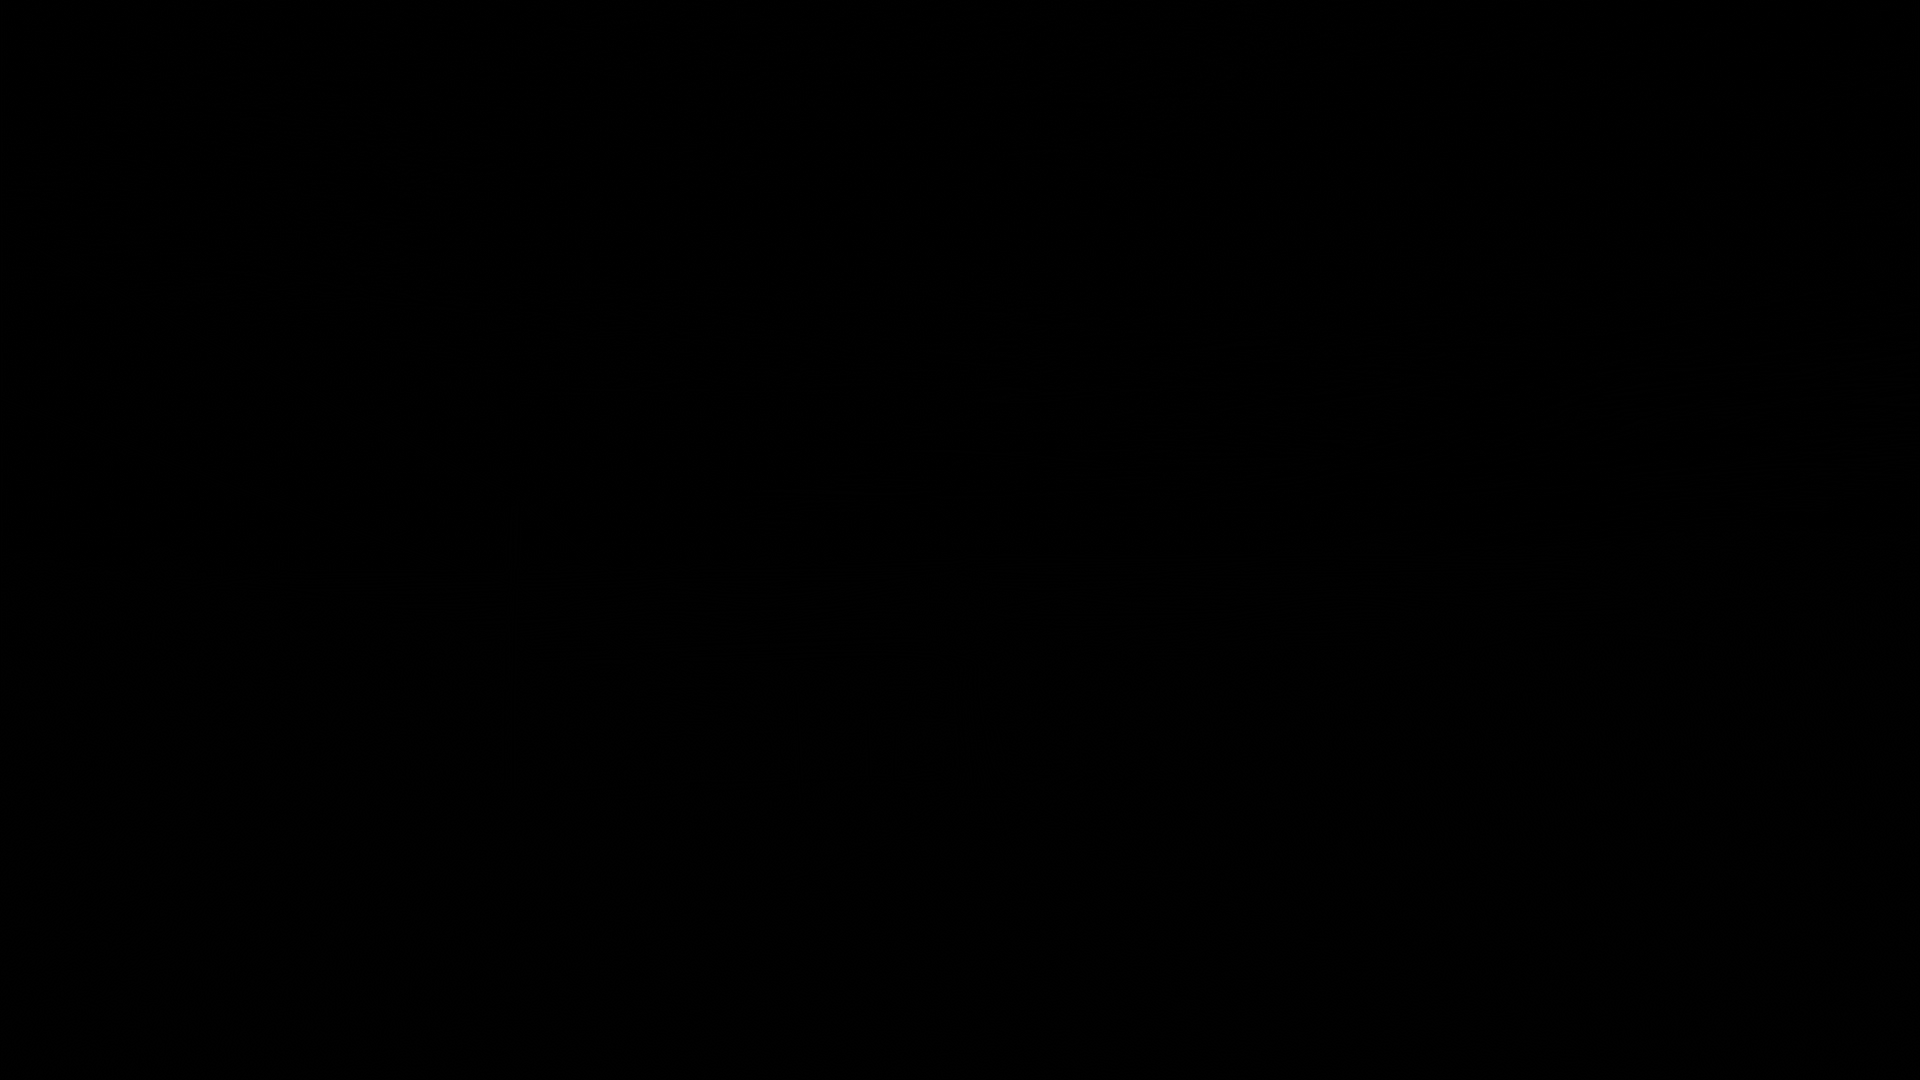

-1

In [16]:
# Aplicamos el detector de línea
binaria = laplaciano(image)

# Mostramos la imagen binaria
cv2_imshow(binaria)
cv2.waitKey(0)

## **Ejercicio 2**<a class="anchor" id="Ejercicio1" ></a>

Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

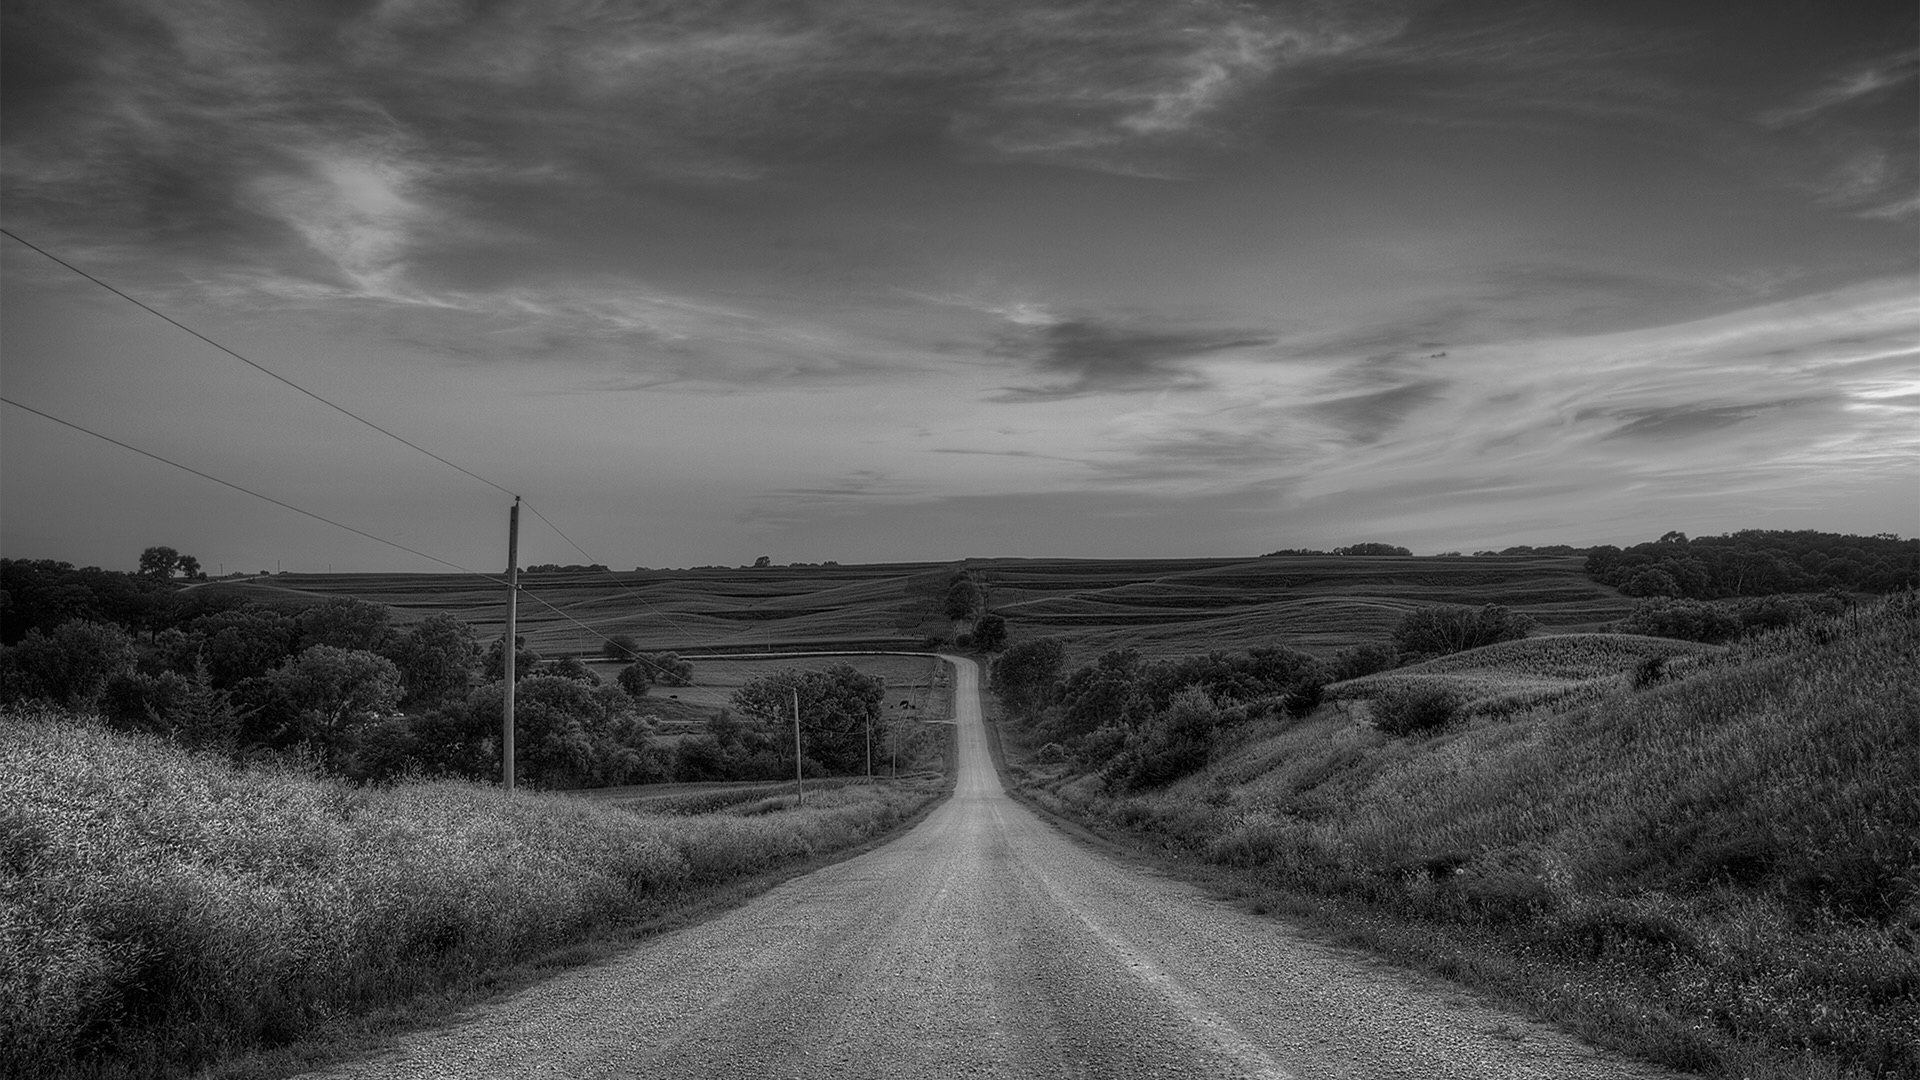

-1

In [28]:
def realzar_imagen_lineas(image, alpha=1.5):
  """
  Realza una imagen mediante la extracción de líneas y la aplicación de una diferencia con la imagen original.

  Parámetros:
    image: Imagen en escala de grises.
    alpha: Factor de multiplicación para los píxeles de la máscara.

  Devuelve:
    Imagen realzada.
  """

  # Aplicamos un blur para suavizar la imagen
  image_blur = cv2.GaussianBlur(image, (5, 5), 0)

  # Detectamos las líneas utilizando el detector de Sobel
  binaria = sobel(image_blur)

  # Creamos una máscara con las líneas
  mascara = np.zeros_like(image)
  mascara[binaria] = 255

  # Aplicamos la diferencia entre la imagen original y la máscara
  imagen_realzada = image - alpha * mascara

  # Saturamos la imagen para evitar valores fuera de rango
  imagen_realzada = np.clip(imagen_realzada, 0, 255).astype(np.uint8)

  return imagen_realzada

# Aplicamos el algoritmo de realce
image_realzada = realzar_imagen_lineas(image)

# Mostramos la imagen realzada
cv2_imshow(image_realzada)
cv2.waitKey(0)
